In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df = pd.read_csv('train.csv')
validation_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Exploration

In [4]:
bins = pd.IntervalIndex.from_tuples([(0, 16), (17, 32), (33, 48), (49, 150)])
exploration_df = train_df
exploration_df['Age_bin'] = pd.cut(train_df['Age'], bins)
l = exploration_df.shape[0]
exploration_df = exploration_df.groupby(['Age_bin', 'Survived']).count().reset_index()
exploration_df['PassengerId'] = round(100 * (exploration_df['PassengerId']/l), 2)
exploration_df = exploration_df[['Age_bin', 'Survived', 'PassengerId']]
exploration_df[exploration_df['Survived'] == 1]

,Age_bin,Survived,PassengerId
1,"(0, 16]",1,6.17
3,"(17, 32]",1,13.69
5,"(33, 48]",1,7.74
7,"(49, 150]",1,3.03


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

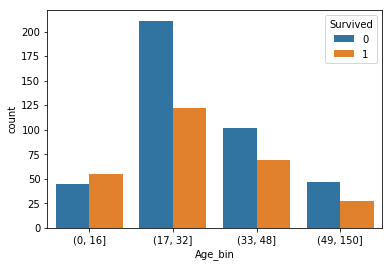

In [6]:
exploration_df = train_df
exploration_df['Age_bin'] = pd.cut(train_df['Age'], bins)
sns.countplot('Age_bin', hue='Survived', data=exploration_df)
plt.show()

In [7]:
round(100* pd.crosstab(train_df['Survived'], train_df['Sex'])/train_df.shape[0], 2)

Sex,female,male
Survived,,
0,9.09,52.53
1,26.15,12.23


### Data Cleanup

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_bin        678 non-null category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.5+ KB


Cabin has only 204 out of 891 entries non-null, lets drop it

In [9]:
train_df.drop(columns=['Cabin'], inplace=True)
validation_df.drop(columns=['Cabin'], inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(17, 32]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(33, 48]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(17, 32]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(33, 48]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(33, 48]"


Impute embarked with most occuring symbol - S

In [10]:
def impute_embarked(sym):
    if sym != sym:
        return 'S'
    return sym
train_df['Embarked'] = train_df['Embarked'].apply(lambda x: impute_embarked(x))
validation_df['Embarked'] = validation_df['Embarked'].apply(lambda x: impute_embarked(x))
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Age_bin        678 non-null category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.6+ KB


In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(17, 32]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(33, 48]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(17, 32]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(33, 48]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(33, 48]"


In [12]:
# train_df.Age.mode()

In [13]:
# mode_age = train_df.Age.mode()[0]

# def impute_age(age):
#     if np.isnan(age):
#         return mode_age
#     return age

# train_df['Age'] = train_df['Age'].apply(lambda x: impute_age(x))
# train_df.info()

In [14]:
from IPython.core.display import display, HTML
HTML('''<script> </script> <form action="javascript:IPython.notebook.execute_cells_above()"><input type="submit" id="toggleButton" value="Run all above Cells"></form>''')

### Data preparation

Handle categorical variables for the model.

In [15]:
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})
validation_df['Sex'] = validation_df['Sex'].map({'male':0, 'female':1})

In [16]:
train_df.rename(columns={'Sex':'Sex_Male'}, inplace=True)
validation_df.rename(columns={'Sex':'Sex_Male'}, inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex_Male,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,"(17, 32]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,"(33, 48]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,"(17, 32]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,"(33, 48]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,"(33, 48]"


In [17]:
embarked = pd.get_dummies(train_df['Embarked'], drop_first=True, prefix='Embarked')
train_df = pd.concat([train_df, embarked], axis=1)
train_df.drop(columns=['Embarked'], inplace=True)

embarked = pd.get_dummies(validation_df['Embarked'], drop_first=True, prefix='Embarked')
validation_df = pd.concat([validation_df, embarked], axis=1)
validation_df.drop(columns=['Embarked'], inplace=True)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex_Male,Age,SibSp,Parch,Ticket,Fare,Age_bin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,"(17, 32]",0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,"(33, 48]",0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,"(17, 32]",0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,"(33, 48]",0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,"(33, 48]",0,1


In [18]:
train_df.drop(columns=['Name', 'Ticket', 'PassengerId', 'Age_bin'], inplace=True)
validation_df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

train_df.head()

,Survived,Pclass,Sex_Male,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


In [19]:
Pclass = pd.get_dummies(train_df['Pclass'], drop_first=True, prefix='Pclass')
train_df = pd.concat([train_df, Pclass], axis=1)
train_df.drop(columns=['Pclass'], inplace=True)

Pclass = pd.get_dummies(validation_df['Pclass'], drop_first=True, prefix='Pclass')
validation_df = pd.concat([validation_df, Pclass], axis=1)
validation_df.drop(columns=['Pclass'], inplace=True)

train_df.head()

,Survived,Sex_Male,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,0,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,1,26.0,0,0,7.9250,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0
4,0,0,35.0,0,0,8.0500,0,1,0,1


In [20]:
#! pip install fancyimpute

In [21]:
# Iterative Imputer
# Impute Age
from fancyimpute import IterativeImputer

df_cols = train_df.columns
train_df = pd.DataFrame(IterativeImputer().fit_transform(train_df), columns=df_cols)

df_cols = validation_df.columns
validation_df = pd.DataFrame(IterativeImputer().fit_transform(validation_df), columns=df_cols)

Using TensorFlow backend.


In [22]:
train_df.head()

,Survived,Sex_Male,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.0,0.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0
2,1.0,1.0,26.0,0.0,0.0,7.9250,0.0,1.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,1.0,0.0,0.0
4,0.0,0.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,1.0


In [23]:
train_df.isnull().sum()

Survived      0
Sex_Male      0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
Pclass_2      0
Pclass_3      0
dtype: int64

In [24]:
from IPython.core.display import display, HTML
HTML('''<script> </script> <form action="javascript:IPython.notebook.execute_cells_above()"><input type="submit" id="toggleButton" value="Run all above Cells"></form>''')

In [25]:
# since iterative imputer converts dtypes to float
cols = train_df.columns
cols = cols.drop(['Age', 'Fare'])
for i in cols:
    train_df[i] = pd.to_numeric(train_df[i])
    train_df[i] = train_df[i].astype(int)
    
cols = validation_df.columns
cols = cols.drop(['Age', 'Fare'])
for i in cols:
    validation_df[i] = pd.to_numeric(validation_df[i])
    validation_df[i] = validation_df[i].astype(int)
    
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Sex_Male      891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_Q    891 non-null int64
Embarked_S    891 non-null int64
Pclass_2      891 non-null int64
Pclass_3      891 non-null int64
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [26]:
train_df.head()

,Survived,Sex_Male,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,0,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,1,26.0,0,0,7.9250,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0
4,0,0,35.0,0,0,8.0500,0,1,0,1


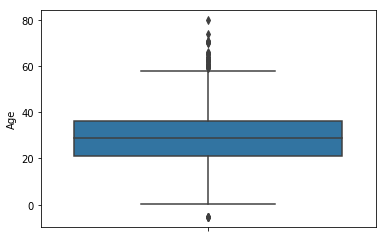

In [27]:
sns.boxplot(train_df['Age'], orient='v')
plt.show()

After itertive imputer, one of the outlier is less than zero!

In [28]:
# Lets remove negative age
train_df[train_df['Age'] < 0]

,Survived,Sex_Male,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
159,0,0,-5.508909,8,2,69.55,0,1,0,1
180,0,1,-5.239933,8,2,69.55,0,1,0,1
201,0,0,-5.508909,8,2,69.55,0,1,0,1
324,0,0,-5.508909,8,2,69.55,0,1,0,1
792,0,1,-5.239933,8,2,69.55,0,1,0,1
846,0,0,-5.508909,8,2,69.55,0,1,0,1
863,0,1,-5.239933,8,2,69.55,0,1,0,1


In [29]:
train_df.drop(train_df[train_df['Age'] < 0].index, inplace=True)

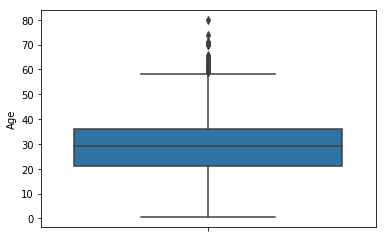

In [30]:
sns.boxplot(train_df['Age'], orient='v')
plt.show()

### Data Understanding

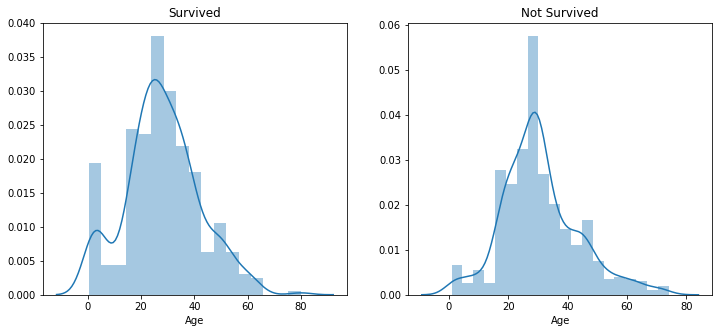

In [31]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(train_df[train_df['Survived'] == 1]['Age'])
plt.title('Survived')
plt.subplot(1, 2, 2)
sns.distplot(train_df[train_df['Survived'] == 0]['Age'])
plt.title('Not Survived')
plt.show()

> Low age and high age survivors are more

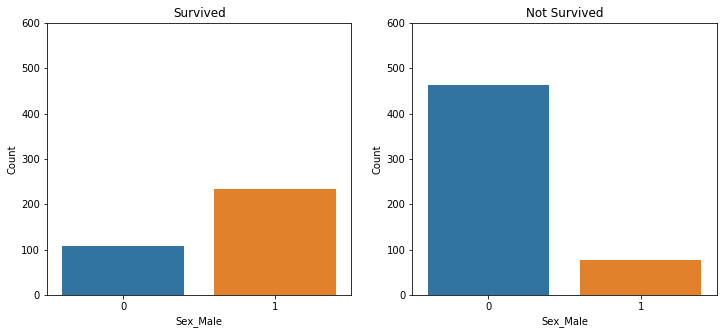

In [32]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
ax = sns.barplot(x='Sex_Male', y='Survived', data=train_df[train_df['Survived'] == 1].groupby('Sex_Male').count().reset_index()[['Sex_Male', 'Survived']], orient='v')
ax.set(ylabel='Count', ylim=(0, 600))
plt.title('Survived')
plt.subplot(1, 2, 2)
ax = sns.barplot(x='Sex_Male', y='Survived', data=train_df[train_df['Survived'] == 0].groupby('Sex_Male').count().reset_index()[['Sex_Male', 'Survived']], orient='v')
ax.set(ylabel='Count', ylim=(0, 600))
plt.title('Not Survived')
plt.show()

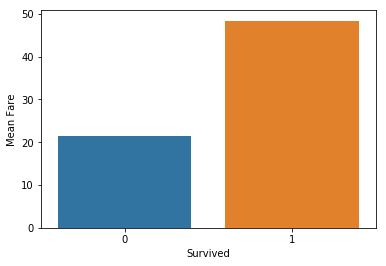

In [33]:
ax = sns.barplot(x='Survived', y='Fare', data=train_df.groupby('Survived').mean().reset_index())
ax.set(ylabel='Mean Fare')
plt.show()

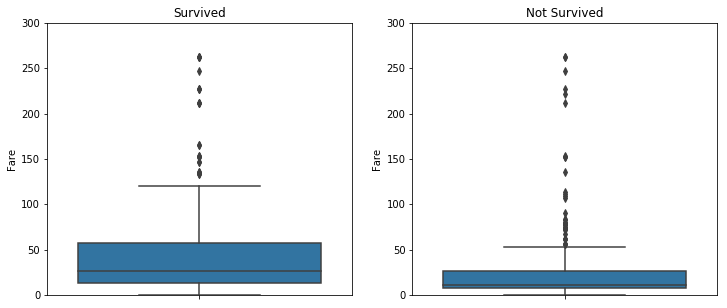

In [34]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
ax = sns.boxplot(train_df[train_df['Survived'] == 1]['Fare'], orient='v')
ax.set(ylim=(0, 300))
plt.title('Survived')
plt.subplot(1, 2, 2)
ax = sns.boxplot(train_df[train_df['Survived'] == 0]['Fare'], orient='v')
ax.set(ylim=(0, 300))
plt.title('Not Survived')
plt.show()

> Clearly lower fare casualities are more

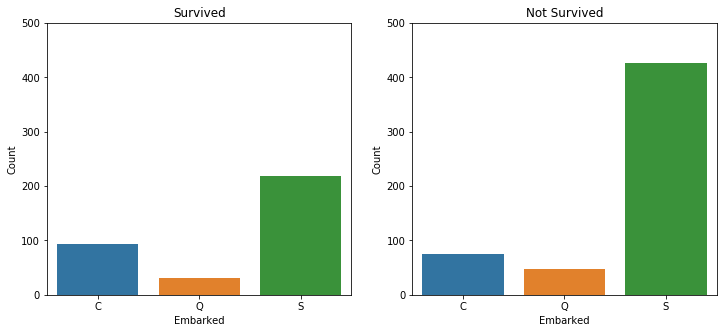

In [35]:
data = exploration_df.groupby(['Survived', 'Embarked']).count().reset_index()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
ax = sns.barplot(x = 'Embarked', y = 'PassengerId', data=data[data['Survived']==1], orient='v')
ax.set(ylabel='Count', ylim=(0, 500))
plt.title('Survived')
plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'Embarked', y = 'PassengerId', data=data[data['Survived']==0], orient='v')
ax.set(ylabel='Count', ylim=(0, 500))
plt.title('Not Survived')
plt.show()

> People embarked from Southampton and Queenstown have less survival rate

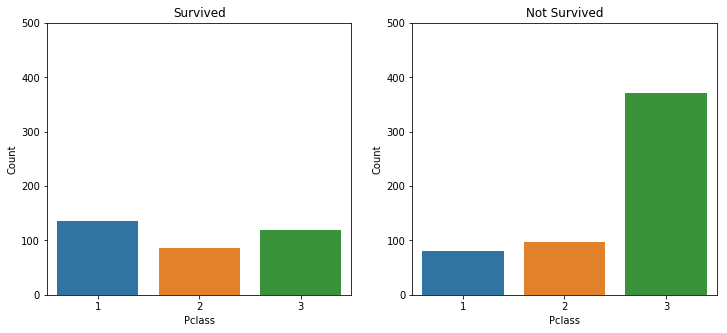

In [36]:
data = exploration_df.groupby(['Survived', 'Pclass']).count().reset_index()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
ax = sns.barplot(x = 'Pclass', y = 'PassengerId', data=data[data['Survived']==1], orient='v')
ax.set(ylabel='Count', ylim=(0, 500))
plt.title('Survived')
plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'Pclass', y = 'PassengerId', data=data[data['Survived']==0], orient='v')
ax.set(ylabel='Count', ylim=(0, 500))
plt.title('Not Survived')
plt.show()

> Clearly first class passengers have better survival rate

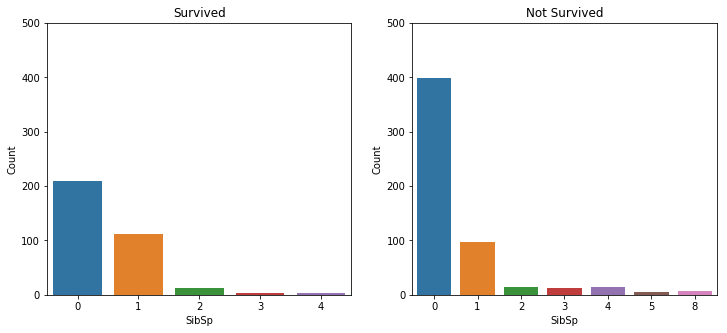

In [37]:
data = exploration_df.groupby(['Survived', 'SibSp']).count().reset_index()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
ax = sns.barplot(x = 'SibSp', y = 'PassengerId', data=data[data['Survived']==1], orient='v')
ax.set(ylabel='Count', ylim=(0, 500))
plt.title('Survived')
plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'SibSp', y = 'PassengerId', data=data[data['Survived']==0], orient='v')
ax.set(ylabel='Count', ylim=(0, 500))
plt.title('Not Survived')
plt.show()

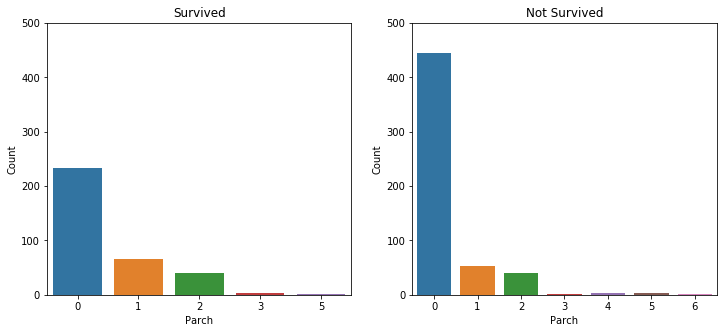

In [38]:
data = exploration_df.groupby(['Survived', 'Parch']).count().reset_index()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
ax = sns.barplot(x = 'Parch', y = 'PassengerId', data=data[data['Survived']==1], orient='v')
ax.set(ylabel='Count', ylim=(0, 500))
plt.title('Survived')
plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'Parch', y = 'PassengerId', data=data[data['Survived']==0], orient='v')
ax.set(ylabel='Count', ylim=(0, 500))
plt.title('Not Survived')
plt.show()

> From the above two plots, single passengers have less survival rate and ones with more than 5 connections also have less survival rate.

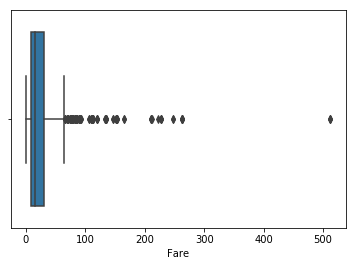

In [39]:
# Outlier
sns.boxplot(train_df['Fare'])
plt.show()

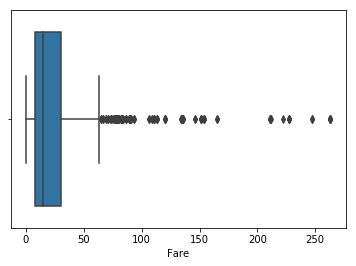

In [40]:
train_df.drop(train_df[train_df['Fare'] > 300].index, inplace=True)
sns.boxplot(train_df['Fare'])
plt.show()

In [41]:
from IPython.core.display import display, HTML
HTML('''<script> </script> <form action="javascript:IPython.notebook.execute_cells_above()"><input type="submit" id="toggleButton" value="Run all above Cells"></form>''')

### Model

In [42]:
x_columns = train_df.columns.drop('Survived')
X_train = train_df[x_columns]
y_train = train_df['Survived']

print(X_train.shape)
print(y_train.shape)

(881, 9)
(881,)


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.7, random_state=1)

print(X_train.shape)
print(y_train.shape)

(616, 9)
(616,)


In [44]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_validation = scaler.transform(validation_df)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred = logreg.predict(X_test)

from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Sensitivity/Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 0.8075471698113208
Sensitivity/Recall: 0.7232142857142857


#### Regularization

In [49]:
#! pip show scikit-learn

In [50]:
# l1 - lasso, l2 - ridge
logreg = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Sensitivity/Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 0.8075471698113208
Sensitivity/Recall: 0.7053571428571429


In [51]:
# class imbalance
train_df.Survived.value_counts()

0    542
1    339
Name: Survived, dtype: int64

In [52]:
logreg = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Sensitivity/Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 0.7924528301886793
Sensitivity/Recall: 0.7410714285714286


In [53]:
# Grid search for tuning hyperparam - C
from sklearn.model_selection import GridSearchCV
param = {'C': [0.0001, 0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.9, 1],
         'penalty': ['l1', 'l2']}

logreg = LogisticRegression(class_weight='balanced', solver='liblinear')
model = GridSearchCV(estimator=logreg,
                     cv=5,
                     param_grid=param,
                     scoring="recall")
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.4,
                               0.5, 0.6, 0.9, 1],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [54]:
model.best_score_

0.771400966183575

In [55]:
model.best_params_

{'C': 0.2, 'penalty': 'l1'}

In [56]:
logreg = LogisticRegression(penalty='l1', solver='liblinear', C=0.2, class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Sensitivity/Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 0.7924528301886793
Sensitivity/Recall: 0.75


In [57]:
# ElasticNet - Combines Ridge and Lasso
# Lasso used when - so many features and want to remove some
# Ridge used when - important features and want to reduce coeff power
logreg = LogisticRegression(penalty='elasticnet', solver='saga', C=0.1, class_weight='balanced', l1_ratio=0.9)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Sensitivity/Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 0.8
Sensitivity/Recall: 0.7410714285714286


In [1]:
from IPython.core.display import display, HTML
HTML('''<script> </script> <form action="javascript:IPython.notebook.execute_cells_above()"><input type="submit" id="toggleButton" value="Run all above Cells"></form>''')

### Submission

In [58]:
y_valid = logreg.predict(X_validation)

In [59]:
validation_df = pd.read_csv('test.csv')
submission = pd.DataFrame()
submission = validation_df[['PassengerId']]
submission.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [60]:
submission['Survived'] = y_valid
submission.head()

/home/shakeeb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [61]:
submission.to_csv('solution.csv',index=False)